In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import timeit
import gc
import time
from contextlib import contextmanager
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
df = pd.read_csv('df2.csv')

In [97]:
percent0 = (df['TARGET'].value_counts()[0] / df['TARGET'].shape) * 100
percent1 = (df['TARGET'].value_counts()[1] / df['TARGET'].shape) * 100


print("Nombre d'individus pour la classe 0 :", df['TARGET'].value_counts()[0], ". Soit", percent0, "% de la population.")
print("Nombre d'individus pour la classe 1 :", df['TARGET'].value_counts()[1], ". Soit", percent1, "% de la population.")

Nombre d'individus pour la classe 0 : 2478 . Soit [50.] % de la population.
Nombre d'individus pour la classe 1 : 2478 . Soit [50.] % de la population.


In [3]:
df.head()

,Unnamed: 0,index,SK_ID_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT,TARGET
0,0,78028,190460,1,0,1,0,112500.0,339241.5,10782.0,...,0.003738,0.114366,0.00307,0.0,0.0,0.0,0.0,0.0,37.143605,0.0
1,1,136678,258522,0,0,0,0,112500.0,225000.0,11250.0,...,0.003738,0.114366,0.00307,0.0,0.0,0.0,0.0,0.0,37.143605,0.0
2,2,160420,285965,0,1,1,1,121500.0,149256.0,15799.5,...,0.003738,0.114366,0.00307,0.0,0.0,0.0,0.0,0.0,37.143605,0.0
3,3,227683,363727,0,1,0,1,225000.0,202500.0,11434.5,...,0.003738,0.114366,0.00307,0.0,0.0,0.0,0.0,0.0,37.143605,0.0
4,4,248382,387386,1,0,0,0,90000.0,472500.0,22860.0,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,6.000000,0.0


In [4]:
df.shape

(4956, 799)

In [6]:
# engregiste
df.to_csv(r'features.csv')

In [7]:
X2= df.drop(['TARGET','SK_ID_CURR','index', 'Unnamed: 0'], axis=1)
y2 = df['TARGET']

In [8]:
from sklearn import model_selection
X2_train, X2_test, y2_train, y2_test = \
    model_selection.train_test_split(X2, y2, test_size=0.3, stratify=y2)

In [9]:
import joblib
# save the model to disk
file = 'file_X2_train.sav'
joblib.dump(X2_train, file)

['file_X2_train.sav']

In [10]:
loaded_mo = joblib.load('file_X2_train.sav')

In [11]:
loaded_mo.shape

(3469, 795)

In [12]:
loaded_mo.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
1084,0,0,0,0,270000.0,993082.5,39514.5,913500.0,0.025164,-23688,...,0.049376,0.003738,0.114366,0.00307,0.0,0.0,0.0,0.0,0.0,37.143605
4370,0,1,0,2,180000.0,810000.0,31653.0,810000.0,0.026392,-11502,...,0.049376,0.003738,0.114366,0.00307,0.0,0.0,0.0,0.0,0.0,37.143605
1901,1,0,1,0,112500.0,225000.0,15219.0,225000.0,0.014520,-11357,...,0.049376,0.003738,0.114366,0.00307,0.0,0.0,0.0,0.0,0.0,37.143605
1850,1,1,0,0,112500.0,1006920.0,40063.5,900000.0,0.035792,-18036,...,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,7.000000
1676,0,1,0,1,54000.0,900000.0,26446.5,900000.0,0.018850,-13078,...,0.049376,0.003738,0.114366,0.00307,0.0,0.0,0.0,0.0,0.0,37.143605


In [13]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X2_train)

X2_train_std = std_scale.transform(X2_train)
X2_test_std = std_scale.transform(X2_test) 

In [14]:
import joblib
# save the model to disk
file = 'file_X2_test_std.sav'
joblib.dump(X2_test_std, file)

['file_X2_test_std.sav']

In [15]:
df_X2_test = pd.DataFrame(X2_test, columns=df.drop(
    ['TARGET','SK_ID_CURR','index', 'Unnamed: 0'], axis=1).columns)

In [16]:
df_X2_test.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
438,1,1,0,0,112500.0,117162.0,11718.0,103500.0,0.018850,-18592,...,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,83.000000
1185,1,0,1,1,108000.0,314100.0,16573.5,225000.0,0.010500,-10117,...,0.049376,0.003738,0.114366,0.00307,0.0,0.0,0.0,0.0,0.0,37.143605
4467,1,0,1,0,1125000.0,1006920.0,40063.5,900000.0,0.035792,-16224,...,0.049376,0.003738,0.114366,0.00307,0.0,0.0,0.0,0.0,0.0,37.143605
2939,0,0,0,0,156600.0,1051245.0,37372.5,877500.0,0.035792,-13032,...,0.049376,0.003738,0.114366,0.00307,0.0,0.0,0.0,0.0,0.0,37.143605
843,0,1,0,0,405000.0,801963.0,40945.5,648000.0,0.020713,-18408,...,0.049376,0.003738,0.114366,0.00307,0.0,0.0,0.0,0.0,0.0,37.143605


In [17]:
df_X2_test.to_csv(r'df_X2_test.csv')

### DummyClassifier

In [18]:
from sklearn.dummy import DummyClassifier

dclf = DummyClassifier(strategy = 'most_frequent', random_state =42) 

start_time = timeit.default_timer()

dclf.fit(X2_train_std, y2_train)

elapsed0 = timeit.default_timer() - start_time

y_pred_dum = dclf.predict(X2_test_std)

y_prob_dum = dclf.predict_proba(X2_test_std)[:, 1]


# Calculate roc auc
roc_value = roc_auc_score(y2_test, y_prob_dum)

print("auc_cv {:.2f} time {:.2f}s".format(roc_value, elapsed0))


auc_cv 0.50 time 0.00s


# GradientBoostingClassifier

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
gbc = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=778, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [37]:
start_time = timeit.default_timer()

gbc.fit(X2_train_std, y2_train)

elapsed12 = timeit.default_timer() - start_time

y_prob = gbc.predict_proba(X2_test_std)[:, 1]

y_pred = np.where(y_prob>0.5, 1, 0)

# Calculate roc auc
roc_value = roc_auc_score(y2_test, predictions)

print("auc_cv {:.2f} time {:.2f}s".format(roc_value, elapsed12))

auc_cv 0.75 time 14.54s


### Enregistrer le modèle

In [22]:
import joblib
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(gbc, filename)

['finalized_model.sav']

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve

In [24]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X2_test_std, y2_test)
print(result)

0.6805648957632818


### Fonction de coût

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_test, y_pred)

In [33]:
cm

array([[491, 252],
       [223, 521]], dtype=int64)

In [34]:
FP= cm[0,1]
print(FP)

252

In [35]:
FN = cm[1,0]
print(FN)

223

In [38]:
print(y_prob)

[0.16009734 0.66205419 0.65429715 ... 0.23426945 0.24749801 0.39008715]


In [39]:
from sklearn.metrics import classification_report

print(classification_report(y2_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.69      0.66      0.67       743
         1.0       0.67      0.70      0.69       744

    accuracy                           0.68      1487
   macro avg       0.68      0.68      0.68      1487
weighted avg       0.68      0.68      0.68      1487



In [ ]:
on va faire une fonction coût pour la banque avec cout = alpha*FN + FP
on cherche le seuil de probabilité qui minimise cette fonction 

In [ ]:
alpha à justifier 

In [40]:
lit = np.linspace(0.0, 1.0, 100)

In [41]:
lit

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [45]:
from sklearn.metrics import f1_score
score = []
cost_function = []
for i in lit :
    y_pred = np.where(y_prob>i, 1, 0)
    
    cm = confusion_matrix(y2_test, y_pred)
    FP = cm[0,1]
    FN = cm[1,0]
    Coût_banque = 5*FN + FP
    cost_function.append(Coût_banque)
    f_score = f1_score(y2_test, y_pred, average='binary')
    score.append(f_score)

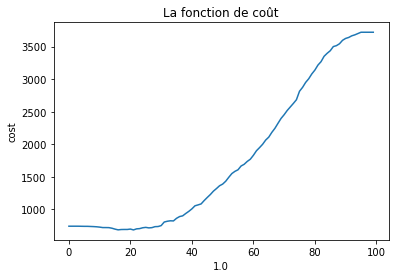

In [46]:
plt.plot(cost_function)
plt.xlabel(i)
plt.ylabel('cost')
plt.title('La fonction de coût')
plt.show()

In [48]:
arr = np.array(cost_function)
arr.argmin(axis=0)

21

seuile_minimale_accepté = 0.21

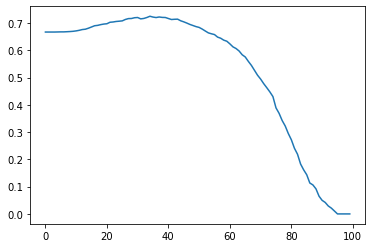

In [44]:
plt.plot(score)

In [50]:
y_pred1 = np.where(y_prob>0.21, 1, 0)

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y2_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.89      0.19      0.32       743
         1.0       0.55      0.98      0.70       744

    accuracy                           0.59      1487
   macro avg       0.72      0.59      0.51      1487
weighted avg       0.72      0.59      0.51      1487



In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_test, y_pred1)
print(cm)

[[144 599]
 [ 17 727]]


In [53]:
f_score1 = f1_score(y2_test, y_pred1, average='binary')
print(f_score1)

0.7024154589371981


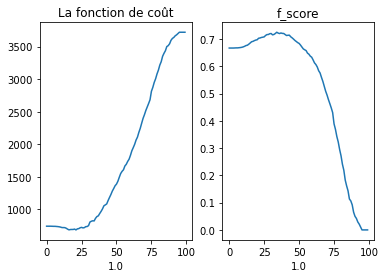

In [54]:
plt.subplot(121),
plt.plot(cost_function),
plt.xlabel(i)
plt.title('La fonction de coût')
plt.subplot(122),
plt.plot(score),
plt.xlabel(i),
plt.title('f_score'),
plt.show()

In [99]:
a = np.array(score)
a.argmax(axis=0)

0

# Importance des fonctionnalités

In [57]:
#X2= df.drop(['TARGET','SK_ID_CURR','index',  'Unnamed: 0'], axis=1)
feature_list = list(X2_train.columns)
# Get numerical feature importances
importances = list(gbc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(X, round(importance, 2)) for X, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: EXT_SOURCE_3         Importance: 0.17
Variable: EXT_SOURCE_2         Importance: 0.15
Variable: EXT_SOURCE_1         Importance: 0.05
Variable: DAYS_EMPLOYED        Importance: 0.03
Variable: DAYS_BIRTH           Importance: 0.02
Variable: NAME_EDUCATION_TYPE_Higher education Importance: 0.02
Variable: DAYS_EMPLOYED_PERC   Importance: 0.02
Variable: PREV_NAME_CONTRACT_STATUS_Refused_MEAN Importance: 0.02
Variable: CODE_GENDER          Importance: 0.01
Variable: AMT_CREDIT           Importance: 0.01
Variable: AMT_ANNUITY          Importance: 0.01
Variable: DAYS_ID_PUBLISH      Importance: 0.01
Variable: DAYS_LAST_PHONE_CHANGE Importance: 0.01
Variable: ANNUITY_INCOME_PERC  Importance: 0.01
Variable: PAYMENT_RATE         Importance: 0.01
Variable: BURO_DAYS_CREDIT_MAX Importance: 0.01
Variable: BURO_DAYS_CREDIT_ENDDATE_MAX Importance: 0.01
Variable: BURO_AMT_CREDIT_SUM_DEBT_MEAN Importance: 0.01
Variable: ACTIVE_DAYS_CREDIT_MAX Importance: 0.01
Variable: ACTIVE_AMT_CREDIT_MAX_O

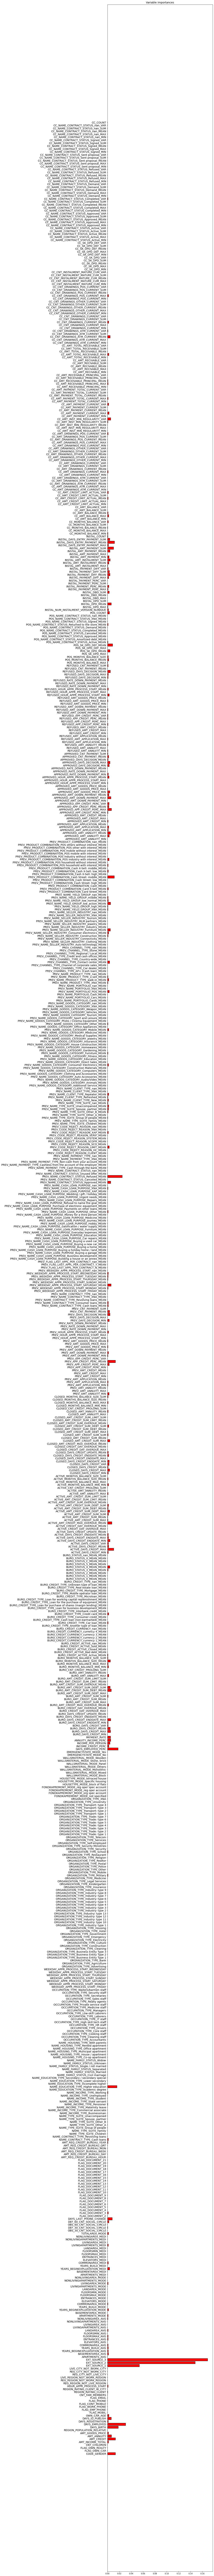

In [58]:
x_values = list(range(len(importances)))
fig, ax = plt.subplots(figsize=(10, 250))
# Make a bar chart
plt.barh(x_values, importances,  color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for y axis
plt.yticks(x_values, feature_list,fontsize = 14)

plt.title('Variable Importances', fontsize = 14);

In [60]:
#X2= df.drop(['TARGET','SK_ID_CURR','index', 'Unnamed: 0'], axis=1)
feature_list = list(X2_train.columns)
# Get numerical feature importances
importances = list(gbc.feature_importances_)

# Extract feature importances

feature_importances_domain = pd.DataFrame({'feature': feature_list, 'importance': importances})

In [61]:
df2 = feature_importances_domain.sort_values(by=['importance'], ascending=False)

In [62]:
df2.shape

(795, 2)

In [63]:
df2

,feature,importance
32,EXT_SOURCE_3,0.168984
31,EXT_SOURCE_2,0.147723
30,EXT_SOURCE_1,0.053627
10,DAYS_EMPLOYED,0.030559
435,PREV_NAME_CONTRACT_STATUS_Refused_MEAN,0.024836
...,...,...
384,PREV_RATE_DOWN_PAYMENT_MAX,0.000000
385,PREV_RATE_DOWN_PAYMENT_MEAN,0.000000
111,NAME_TYPE_SUITE_Group of people,0.000000
110,NAME_TYPE_SUITE_Family,0.000000


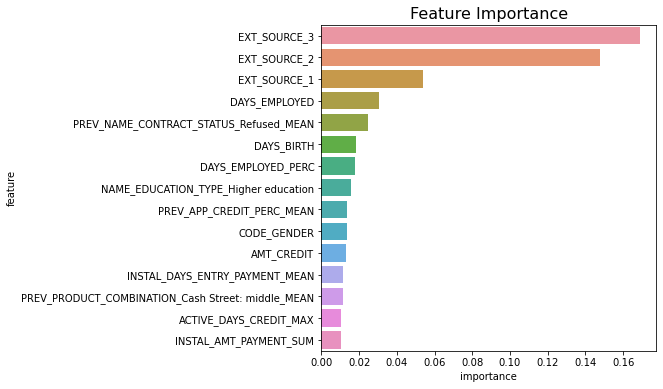

In [313]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Feature Importance', fontsize=16)
sns.barplot(y="feature", x="importance", data=df2.head(15), orient='h')
plt.show()

In [312]:
df2

,feature,importance
32,EXT_SOURCE_3,0.168984
31,EXT_SOURCE_2,0.147723
30,EXT_SOURCE_1,0.053627
10,DAYS_EMPLOYED,0.030559
435,PREV_NAME_CONTRACT_STATUS_Refused_MEAN,0.024836
...,...,...
384,PREV_RATE_DOWN_PAYMENT_MAX,0.000000
385,PREV_RATE_DOWN_PAYMENT_MEAN,0.000000
111,NAME_TYPE_SUITE_Group of people,0.000000
110,NAME_TYPE_SUITE_Family,0.000000


In [65]:
df2.to_csv(r'feature_importances.csv')

# SHAP

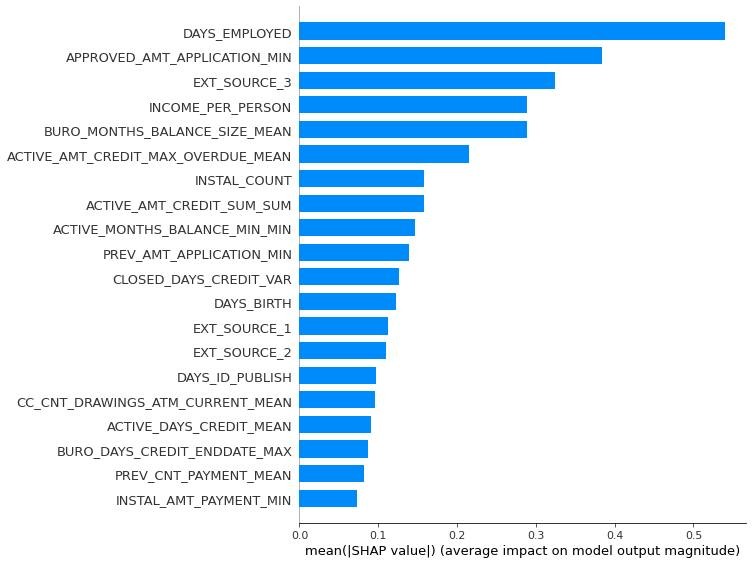

In [66]:
import shap
shap_values = shap.TreeExplainer(gbc).shap_values(X2_train)
shap.summary_plot(shap_values, X2_train, plot_type="bar")

In [101]:
pd.DataFrame(shap_values)

,0,1,2,3,4,5,6,7,8,9,...,785,786,787,788,789,790,791,792,793,794
0,-0.013958,0.0,0.0,0.079131,0.011548,0.034379,-0.025769,0.017687,0.0,-0.116110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.012594,0.0,0.0,-0.079131,0.011548,0.028331,-0.025769,0.017687,0.0,-0.121882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.039546,0.0,0.0,0.079131,0.011548,0.034943,-0.025769,0.017687,0.0,-0.121882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003426,0.0,0.0,0.079131,0.011548,0.031961,-0.027009,0.017687,0.0,-0.121375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.013958,0.0,0.0,-0.079131,0.011548,0.034493,-0.007537,0.017687,0.0,-0.115233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3464,-0.014547,0.0,0.0,-0.079131,0.011548,0.030857,0.018978,0.017687,0.0,-0.122252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3465,0.012767,0.0,0.0,0.079131,0.011548,0.030857,-0.027009,0.017687,0.0,-0.130503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3466,-0.012353,0.0,0.0,-0.066019,0.011548,0.031546,0.010954,0.017687,0.0,-0.121375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3467,0.003426,0.0,0.0,-0.079131,0.011548,0.032706,-0.027009,0.017687,0.0,-0.121375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


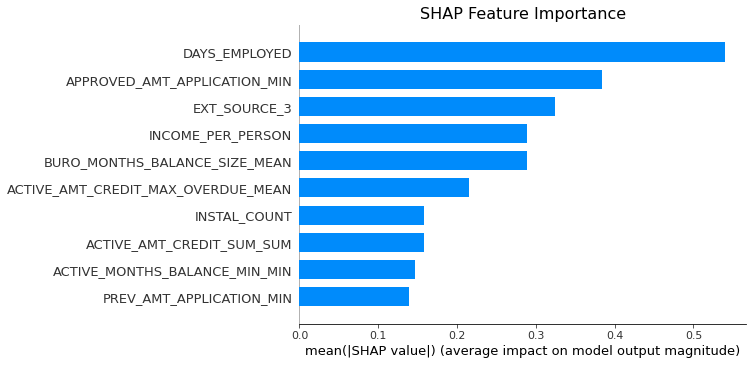

In [308]:
import shap
explainer = shap.TreeExplainer(gbc)
shap_values = explainer.shap_values(X2_train)

#np.save('shapValues', np.array(shap_values[0]))
#np.save('shapValues1', np.array(shap_values[1]))

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('SHAP Feature Importance', fontsize=16)
shap.summary_plot(shap_values, X2_train, plot_type="bar",max_display=10)
plt.show()

In [72]:
shap.initjs()

# Write in a function
def shap_plot(j):
    p = shap.force_plot(explainer.expected_value, (shap_values)[j,:], X2_train.iloc[j,:])
    return(p)
shapvalues = shap_values

def reportCustomerFeatures(CustId, NbFeatures = 12):
    
    maxI10 = sorted(range(len(shapvalues[CustId])), key=lambda x: abs(shapvalues[CustId][x]))[-NbFeatures:]
    FeatureNames = np.empty(NbFeatures, dtype=object)
    FeatureShapValues = np.empty(NbFeatures, dtype=float)
    
    for i, Id in enumerate(reversed(maxI10)):
        FeatureNames[i] = X2_train.columns[Id]
        FeatureShapValues[i] = shapvalues[CustId][Id]
        
        print(Id, X2_train.columns[Id], shapvalues[CustId][Id])
    positive = FeatureShapValues > 0
    colors = list(map(lambda x: 'red' if x else 'blue', positive))
    print(colors)
    fig, ax = plt.subplots()
    plt.title("Customer {}'s SHAP Feature Importance".format(CustId), fontsize=16)
    sns.barplot(x=FeatureShapValues, y=FeatureNames, palette=colors)
    plt.show()
    return shap_plot(CustId)



10 DAYS_EMPLOYED -0.572878326279154
32 EXT_SOURCE_3 -0.46615208227599164
553 APPROVED_AMT_APPLICATION_MIN -0.3913536757409567
270 BURO_MONTHS_BALANCE_SIZE_MEAN -0.30107391957897817
317 ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN 0.29382226482718476
337 CLOSED_DAYS_CREDIT_VAR 0.28688436592220956
242 INCOME_PER_PERSON 0.2600052552982801
125 NAME_EDUCATION_TYPE_Higher education -0.18444829198624166
320 ACTIVE_AMT_CREDIT_SUM_SUM 0.1664995886416121
653 INSTAL_COUNT -0.16340550926282893
330 ACTIVE_MONTHS_BALANCE_MIN_MIN -0.15358317965927817
31 EXT_SOURCE_2 -0.1427293556760319
['blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue']


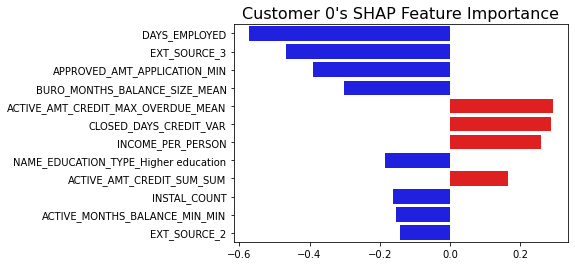

In [73]:
reportCustomerFeatures(0)

553 APPROVED_AMT_APPLICATION_MIN -0.549087837885333
10 DAYS_EMPLOYED -0.5315801067620948
242 INCOME_PER_PERSON 0.3096792703238981
317 ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN 0.29382226482718476
337 CLOSED_DAYS_CREDIT_VAR 0.2857311788868798
270 BURO_MONTHS_BALANCE_SIZE_MEAN -0.25498368414519756
653 INSTAL_COUNT -0.16340550926282893
330 ACTIVE_MONTHS_BALANCE_MIN_MIN -0.15358317965927817
320 ACTIVE_AMT_CREDIT_SUM_SUM 0.13004958354476315
31 EXT_SOURCE_2 -0.1285276368289512
9 DAYS_BIRTH -0.12188220553387104
12 DAYS_ID_PUBLISH 0.12148648624436376
['blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'red']


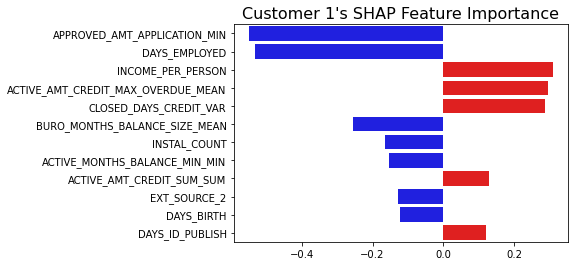

In [74]:
reportCustomerFeatures(1)

In [81]:
# j'enregistre les valeurs shap 
np.save("shapValues20K", shapvalues)

In [86]:
import pandas as pd
import numpy as np
import joblib


best_thresh = 0.21

loaded_model = joblib.load('finalized_model.sav')
loaded_X2_test_std = joblib.load('file_X2_test_std.sav')



def score():
    y_predict_proba = loaded_model.predict_proba(loaded_X2_test_std)
    class_predict = np.where(y_predict_proba[:, 1]>best_thresh, 1, 0)
    df_scores = pd.DataFrame(y_predict_proba[:, 1],columns=['proba'])
    df_scores['class'] = class_predict
    return df_scores

In [87]:
df_score = score()

In [89]:
df_score.head()

,proba,class
0,0.160097,0
1,0.662054,1
2,0.654297,1
3,0.747291,1
4,0.483249,1


In [96]:
df_score[df_score['class'] == 0]

,proba,class
0,0.160097,0
19,0.204660,0
26,0.201219,0
37,0.119681,0
55,0.187859,0
...,...,...
1428,0.125134,0
1433,0.080609,0
1450,0.186507,0
1470,0.161214,0


In [91]:
df_score.to_csv(r'df_score.csv')

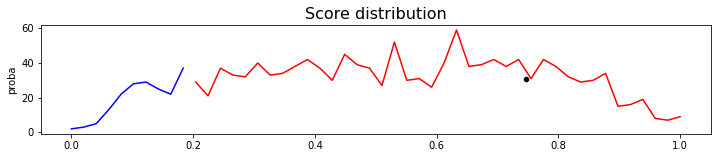

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

NbBins = 50
dist = pd.cut(df_score['proba'], bins=NbBins).value_counts()
dist.sort_index(inplace=True)
ticks = np.linspace(0, 1, NbBins)


Cust = 3
fig, ax = plt.subplots(figsize=(12,2))
plt.title("Score distribution", fontsize=16)
Threshold=int(0.21*len(dist))


sns.lineplot(x=ticks[:Threshold], y=dist[:Threshold], color='blue')
sns.lineplot(x=ticks[Threshold:], y=dist[Threshold:], color='red')
Score = df_score.loc[Cust, 'proba']
rank = int(Score*len(dist))

sns.scatterplot(x=[Score], y=[dist[rank]], color='black')
plt.show()


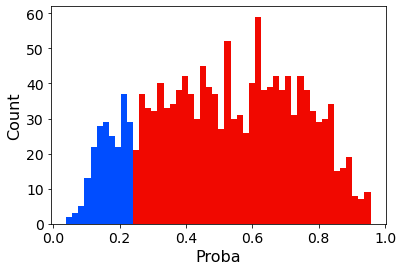

In [284]:
N, bins, patches = plt.hist(df_score['proba'], 50)
Threshold=int(0.21*len(dist))
cmap = plt.get_cmap('jet')
low = cmap(0.2)
medium =cmap(0.9)
#high = cmap(0.7)


for i in range(0,11):
    patches[i].set_facecolor(low)
for i in range(11,50):
    patches[i].set_facecolor(medium)
#for i in range(15,20):
    #patches[i].set_facecolor(high)

plt.xlabel("Proba", fontsize=16)  
plt.ylabel("Count", fontsize=16)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
#ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.show()

In [306]:
DashBoradTH =0.2
customerId= 1
fig = go.Figure()
fig.add_trace(
    go.Histogram(x=df_score['proba'], histnorm='percent'))



fig.add_shape(
       go.layout.Shape(type='line', xref='x', yref='paper',name ='aa',
                      x0=DashBoradTH, y0=0, x1=DashBoradTH, y1=1, line={'dash': 'solid','color':'green','width':5}),)
fig.add_vrect(x0=0, x1=DashBoradTH, 
              annotation_text="Succes", annotation_position="top left",
              fillcolor="blue", opacity=0.2, line_width=0)
fig.add_vrect(x0=0.21, x1=1, 
              annotation_text="Default", annotation_position="top left",
              fillcolor="red", opacity=0.2, line_width=0)
fig.add_shape(
       go.layout.Shape(type='line', xref='x', yref='paper',name ='',
                      x0=Score, y0=0, x1=Score, y1=0.98, line={'dash': 'dot','color':'red','width':5}),)

fig.add_annotation(x=DashBoradTH, y=6,
            text="Seuil",
            showarrow=True,
            arrowhead=1,bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor="#ff7f0e",
                   opacity=0.8
                  )
fig.add_annotation(x=Score, y=2,
            text="Score",
            showarrow=True,
            arrowhead=1,bordercolor="#c7c7c7",
            borderwidth=2,
            borderpad=4,
            bgcolor="#ff7f0e",
                   opacity=0.8
                  )


fig.update_layout(
    #title_text='Score Distribution', # title of plot
    xaxis_title_text='Proba', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.01, # gap between bars of adjacent location coordinates
    bargroupgap=0.05, # gap between bars of the same location coordinates
    title="Prediction Distribution",
    margin=dict(l=20, r=20, t=40, b=20),
    width=600, height=250,
    #paper_bgcolor="LightSteelBlue",
)

fig.show()

In [294]:
Score

0.6985138227334916